## HW3: K Means Clustering

In [131]:
import pandas as pd
import numpy as np
df = pd.read_csv("data-hw3.txt", delimiter="\t")
df

,College,Win_2015,Win_2017,Rank_2015,Rank_2017
0,Alabama,12,11,2,4
1,Clemson,13,12,1,1
2,LSU,8,9,22,16
3,Michigan State,12,9,3,18
4,Northwestern,10,9,8,14
5,Notre Dame,10,9,8,14
6,Ohio State,11,11,7,5
7,Oklahoma,11,12,4,2
8,Oklahoma State,10,9,13,17
9,Stanford,11,9,5,15


In [132]:
objects = []
instances = []
for instance in df.to_numpy():
    objects.append(instance[0])
    featureValues = list(instance[1:])
    instances.append(featureValues)
nInstances = len(instances)
print("Number of instances:", nInstances)
print(f'objects: {objects} =')
print(f'instances: {instances}')

Number of instances: 12
objects: ['Alabama', 'Clemson', 'LSU', 'Michigan State', 'Northwestern', 'Notre Dame', 'Ohio State', 'Oklahoma', 'Oklahoma State', 'Stanford', 'TCU', 'Wisconsin'] =
instances: [[12, 11, 2, 4], [13, 12, 1, 1], [8, 9, 22, 16], [12, 9, 3, 18], [10, 9, 8, 14], [10, 9, 8, 14], [11, 11, 7, 5], [11, 12, 4, 2], [10, 9, 13, 17], [11, 9, 5, 15], [10, 10, 11, 13], [9, 12, 23, 6]]


In [133]:
X = np.array(instances)
X

array([[12, 11,  2,  4],
       [13, 12,  1,  1],
       [ 8,  9, 22, 16],
       [12,  9,  3, 18],
       [10,  9,  8, 14],
       [10,  9,  8, 14],
       [11, 11,  7,  5],
       [11, 12,  4,  2],
       [10,  9, 13, 17],
       [11,  9,  5, 15],
       [10, 10, 11, 13],
       [ 9, 12, 23,  6]])

### Q1: Compare Initial Centroids

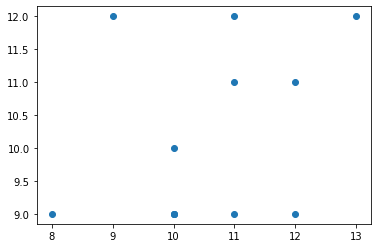

In [134]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

In [167]:
def calculate_centroid( cluster):
    C = [0, 0]
    Xlist = []
    Ylist = []
    for item in cluster:
        X, Y, i = item.split(",")
        Xlist.append( int(X) )
        Ylist.append( int(Y) )
      
    C[0] = sum(Xlist)/ len(Xlist)
    C[1] = sum(Ylist)/ len(Ylist)

    
    return C

test_cluster = ['12,11,0', '13,12, 1', '11,12, 2', '11,9,3']
print( calculate_centroid( test_cluster))

[11.75, 11.0]


1) Initial centroids: (7, 7) and (14, 14)

In [190]:
X = np.array(instances)
X

array([[12, 11,  2,  4],
       [13, 12,  1,  1],
       [ 8,  9, 22, 16],
       [12,  9,  3, 18],
       [10,  9,  8, 14],
       [10,  9,  8, 14],
       [11, 11,  7,  5],
       [11, 12,  4,  2],
       [10,  9, 13, 17],
       [11,  9,  5, 15],
       [10, 10, 11, 13],
       [ 9, 12, 23,  6]])

In [192]:
## TODO: K Means clustering (K = 2, Euclidean distance)
# features: Wins in 2015 (position 1) and wins in 2017 (position 2)
from math import sqrt

# set initial centroids
C1 = [7, 7]
C2 = [14, 14]
    
# initialize dictionary

dict = {}
for i in range( len(X)):
    point = str(X[i, 0]) + "," + str(X[i, 1]) + "," + str(i)
    #print(point)
    dict[point] = [0, 0]

cluster1 = []
cluster2 = []
clust1_copy = []
clust2_copy = []
change = True
iterations = 0

while change == True:

    cluster1.clear()
    cluster2.clear()
    # keep all euclidean distances D1, D2 from point to C1, C2 in dict
    # in form dict[ point] = [ D1, D2]
    for i, point in enumerate(dict.keys()):
        distance1 = sqrt( (X[i, 0]- C1[0])**2 + (X[i, 1] - C1[1])**2)
        distance2 = sqrt( (X[i, 0]- C2[0])**2 + (X[i, 1] - C2[1])**2)
        dict[point][0] = distance1
        dict[point][1] = distance2
    
        if distance1 > distance2:
            cluster1.append( point)
        else:
            cluster2.append( point)
        
        
     # look to see if clustering changed
    if clust1_copy == cluster1 and clust2_copy == cluster2 and iterations > 0:
        change = False
        
    clust1_copy = cluster1
    clust2_copy = cluster2
    
    # recalculate centroids
    C1 = calculate_centroid( cluster1 )
    C2 = calculate_centroid( cluster2 )
    iterations += 1
    
#print(dict)
print(f'Final centroid: {C2}')
print(f'Final centroid: {C1}')
print(f'iterations: {iterations}')

Final centroid: [11.75, 11.5]
Final centroid: [10.0, 9.5]
2


 Cluster 1: [[8, 9], [12, 9], [10, 9], [10, 9], [10, 9], [11, 9], [10, 10], [9, 12]]
 Cluster 2: [[12, 11], [13, 12], [11, 11], [11, 12]]


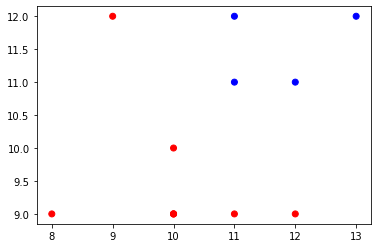

In [170]:
## TODO: Visualization
cluster1_int = []
cluster2_int = []

for item in cluster1:
    X, Y, i = item.split(",")
    point = [int(X), int(Y)]
    cluster1_int.append( point  )

for item in cluster2:
    X, Y, i = item.split(",")
    point = [int(X), int(Y)]
    cluster2_int.append( point  )

A = np.array( cluster1_int)
B = np.array( cluster2_int) 
C = np.concatenate( (A, B), axis=0)

colormap = np.array([ 'red', 'blue'])
categories = np.array([0,0,0,0,0,0,0,0,1,1,1,1])
plt.scatter( C[:,0] , C[:, 1], c=colormap[categories])

print(f' Cluster 1: {cluster1_int}')
print(f' Cluster 2: {cluster2_int}')

In [193]:
# Accuracy = (TN + TP)/ (ALL)


# SSE
SSE = 0
for item in cluster1_int:
    x, y = item
    SSE += ( (int(x)- 11.75)**2 +(int(y) - 11.5)**2 )

for item in cluster2_int:
    X, Y = item
    SSE += ( (int(x)- 10)**2 +(int(y) - 9.5)**2 )
    
print(f'SSE for centroid (11.75,11.5) and (10.0, 9.5) is: {SSE}')

SSE for centroid (11.75,11.5) and (10.0, 9.5) is: 67.9375


2) Initial centroids: (7, 7) and (7, 14)

In [194]:
X = np.array(instances)
X

array([[12, 11,  2,  4],
       [13, 12,  1,  1],
       [ 8,  9, 22, 16],
       [12,  9,  3, 18],
       [10,  9,  8, 14],
       [10,  9,  8, 14],
       [11, 11,  7,  5],
       [11, 12,  4,  2],
       [10,  9, 13, 17],
       [11,  9,  5, 15],
       [10, 10, 11, 13],
       [ 9, 12, 23,  6]])

In [198]:
## TODO: K Means clustering (K = 2, Euclidean distance)

## TODO: K Means clustering (K = 2, Euclidean distance)
# features: Wins in 2015 (position 1) and wins in 2017 (position 2)
from math import sqrt

# set initial centroids
C1_v2 = [7, 7]
C2_v2 = [7, 14]
    
# initialize dictionary
dict = {}
for i in range( len(X)):
    point = str(X[i, 0]) + "," + str(X[i, 1]) + "," + str(i)
    #print(point)
    dict[point] = [0, 0]

cluster1 = []
cluster2 = []
clust1_copy = []
clust2_copy = []
change = True
iterations = 0

while change == True:

    cluster1.clear()
    cluster2.clear()
    # keep all euclidean distances D1, D2 from point to C1, C2 in dict
    # in form dict[ point] = [ D1, D2]
    for i,point in enumerate(dict.keys()):
        distance1 = sqrt( (X[i, 0]- C1_v2[0])**2 + (X[i, 1] - C1_v2[1])**2)
        distance2 = sqrt( (X[i, 0]- C2_v2[0])**2 + (X[i, 1] - C2_v2[1])**2)
        dict[point][0] = distance1
        dict[point][1] = distance2
    
        if distance1 > distance2:
            cluster1.append( point)
        else:
            cluster2.append( point)
        
        
     # look to see if clustering changed
    if clust1_copy == cluster1 and clust2_copy == cluster2 and iterations > 0:
        change = False
        
    clust1_copy = cluster1
    clust2_copy = cluster2
    
    # recalculate centroids
    C1_v2 = calculate_centroid( cluster1 )
    C2_v2 = calculate_centroid( cluster2 )
    iterations += 1
    
print(f'Final centroid: {C2_v2}')
print(f'Final centroid: {C1_v2}')


Final centroid: [11.2, 11.6]
Final centroid: [10.142857142857142, 9.142857142857142]


 Cluster 1: [[8, 9], [12, 9], [10, 9], [10, 9], [10, 9], [11, 9], [10, 10]]
 Cluster 2: [[12, 11], [13, 12], [11, 11], [11, 12], [9, 12]]


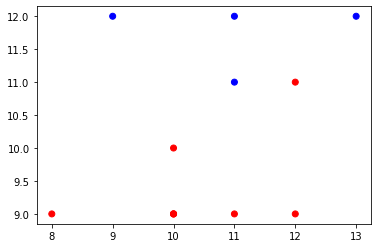

In [201]:
## TODO: Visualization (2 clusters)
cluster1_int = []
cluster2_int = []

for item in cluster1:
    X, Y, i = item.split(",")
    point = [int(X), int(Y)]
    cluster1_int.append( point  )

for item in cluster2:
    X, Y, i = item.split(",")
    point = [int(X), int(Y)]
    cluster2_int.append( point  )

A = np.array( cluster1_int)
B = np.array( cluster2_int) 
C = np.concatenate( (A, B), axis=0)

colormap = np.array([ 'red', 'blue'])
categories = np.array([0,0,0,0,0,0,0,0,1,1,1,1])
plt.scatter( C[:,0] , C[:, 1], c=colormap[categories])

print(f' Cluster 1: {cluster1_int}')
print(f' Cluster 2: {cluster2_int}')

Evaluation: Final centroids (10.2, 11.6) and (10.14, 9.14)

In [207]:
SSE = 0
for item in cluster1_int:
    x, y = item
    SSE += ( (int(x)- 10.2)**2 +(int(y) - 11.6)**2 )

for item in cluster2_int:
    X, Y = item
    SSE += ( (int(x)- 10.14)**2 +(int(y) - 9.14)**2 )
    
print(f'SSE for centroid (10.2,11.6) and (10.14, 9.14) is: {SSE}')

SSE for centroid (10.2,11.6) and (10.14, 9.14) is: 55.795999999999985


### Q2: Compare Features

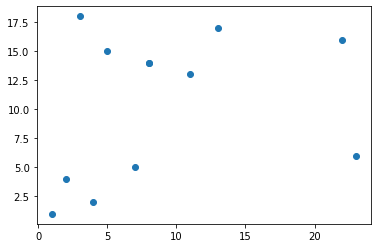

In [9]:
plt.scatter(X[:,2], X[:,3])

Initial centroids: (1, 1) and (25, 25), Manhattan distance

In [217]:
X = np.array(instances)
X

array([[12, 11,  2,  4],
       [13, 12,  1,  1],
       [ 8,  9, 22, 16],
       [12,  9,  3, 18],
       [10,  9,  8, 14],
       [10,  9,  8, 14],
       [11, 11,  7,  5],
       [11, 12,  4,  2],
       [10,  9, 13, 17],
       [11,  9,  5, 15],
       [10, 10, 11, 13],
       [ 9, 12, 23,  6]])

In [218]:
## TODO: K Means clustering (K = 2, Manhattan distance)

# set initial centroids
C1 = [1, 1]
C2 = [25, 25]
    
# initialize dictionary
dict = {}
for i in range( len(X)):
    point = str(X[i, 2]) + "," + str(X[i, 3]) + "," + str(i)
    dict[point] = [0, 0, 0]

cluster1 = []
cluster2 = []
clust1_copy = []
clust2_copy = []
change = True
iterations = 0

while change == True:

    cluster1.clear()
    cluster2.clear()
    # keep all Manhattan distances D1, D2 from point to C1, C2 in dict
    # in form dict[ point] = [ D1, D2]
    for i,point in enumerate(dict.keys()):
        distance1 = abs(X[i, 2]- C1[0]) + abs(X[i, 3] - C1[1] )
        distance2 = abs(X[i, 2]- C2[0]) + abs(X[i, 3] - C2[1] )
        dict[point][0] = distance1
        dict[point][1] = distance2
    
        if distance1 < distance2:
            cluster1.append( point)
        else:
            cluster2.append( point)
        
        
     # look to see if clustering changed
    if clust1_copy == cluster1 and clust2_copy == cluster2 and iterations > 0:
        change = False
        
    clust1_copy = cluster1
    clust2_copy = cluster2
    
    # recalculate centroids
    C1 = calculate_centroid( cluster1 )
    C2 = calculate_centroid( cluster2 )
    iterations += 1
 
print(cluster1)
print(cluster2)
print(f'Final centroid: {C1}')
print(f'Final centroid: {C2}')

['2,4,0', '1,1,1', '3,18,3', '8,14,4', '8,14,5', '7,5,6', '4,2,7', '5,15,9']
['22,16,2', '13,17,8', '11,13,10', '23,6,11']
Final centroid: [4.75, 9.125]
Final centroid: [17.25, 13.0]


 Cluster 1: [[2, 4], [1, 1], [3, 18], [8, 14], [8, 14], [7, 5], [4, 2], [5, 15]]
 Cluster 2: [[22, 16], [13, 17], [11, 13], [23, 6]]


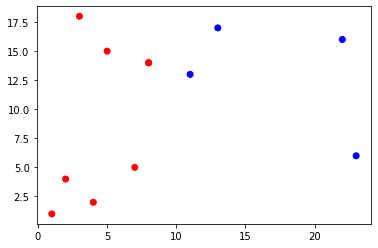

In [214]:
## TODO: Visualization (2 clusters)
cluster1_int = []
cluster2_int = []

for item in cluster1:
    X, Y, i = item.split(",")
    point = [int(X), int(Y)]
    cluster1_int.append( point  )

for item in cluster2:
    X, Y, i = item.split(",")
    point = [int(X), int(Y)]
    cluster2_int.append( point  )

A = np.array( cluster1_int)
B = np.array( cluster2_int) 
C = np.concatenate( (A, B), axis=0)

colormap = np.array([ 'red', 'blue'])
categories = np.array([0,0,0,0,0,0,0,0,1,1,1,1])
plt.scatter( C[:,0] , C[:, 1], c=colormap[categories])

print(f' Cluster 1: {cluster1_int}')
print(f' Cluster 2: {cluster2_int}')



Evaluation: SSE for centroids (17.25) and (4.75,9.124) based on features Rank 2015 and Rank 2017

In [230]:
SSE = 0
for item in cluster1_int:
    x, y = item
    SSE += ( (int(x)- 4.75 )**2 +(int(y) - 9.124)**2 )

for item in cluster2_int:
    x, y = item
    SSE += ( (int(x)- 17.25)**2 +(int(y) - 13.0)**2 )
    
print(f'SSE for centroid (17.25, 13.0) and (4.75, 9.124) is: {SSE}')

SSE for centroid (17.25, 13.0) and (4.75, 9.124) is: 559.125008


### Q3: Choose a good K

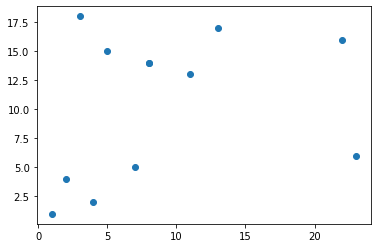

In [12]:
plt.scatter(X[:,2], X[:,3])

Suppose K = 3. Specify three initial centroids by yourself. Manhattan distance.

In [223]:
X = np.array(instances)
X

array([[12, 11,  2,  4],
       [13, 12,  1,  1],
       [ 8,  9, 22, 16],
       [12,  9,  3, 18],
       [10,  9,  8, 14],
       [10,  9,  8, 14],
       [11, 11,  7,  5],
       [11, 12,  4,  2],
       [10,  9, 13, 17],
       [11,  9,  5, 15],
       [10, 10, 11, 13],
       [ 9, 12, 23,  6]])

In [225]:
## TODO: K Means clustering (K = 3, Manhattan distance)

# set initial centroids
C1 = [5, 5]
C2 = [10, 15]
C3 = [20,10]
# initialize dictionary
dict = {}
for i in range( len(X)):
    point = str(X[i, 2]) + "," + str(X[i, 3]) + "," + str(i)
    #print(point)
    dict[point] = [0, 0, 0]

cluster1 = []
cluster2 = []
cluster3 = []
clust1_copy = []
clust2_copy = []
clust3_copy = []
change = True
iterations = 0

while change == True:

    cluster1.clear()
    cluster2.clear()
    cluster3.clear()
    
    # keep all Manhattan distances D1, D2 from point to C1, C2 in dict
    # in form dict[ point] = [ D1, D2]
    for i,point in enumerate(dict.keys()):
        distance1 = abs(X[i, 2]- C1[0]) + abs(X[i, 3] - C1[1] )
        distance2 = abs(X[i, 2]- C2[0]) + abs(X[i, 3] - C2[1] )
        distance3 = abs(X[i, 2]- C3[0]) + abs(X[i, 3] - C3[1])
        dict[point][0] = distance1
        dict[point][1] = distance2
        dict[point][2] = distance3
    
        min_distance = min( distance1, distance2, distance3)
        
        if min_distance == distance3:
            cluster3.append(point)
        elif min_distance == distance2:
            cluster2.append( point)
        else:
            cluster1.append( point)
        
        
     # look to see if clustering changed
    if clust1_copy == cluster1 and clust2_copy == cluster2 and iterations > 0:
        change = False
        
    clust1_copy = cluster1
    clust2_copy = cluster2
    clust3_copy = cluster2
    
    # recalculate centroids
    C1 = calculate_centroid( cluster1 )
    C2 = calculate_centroid( cluster2 )
    C3 = calculate_centroid( cluster3 )
    iterations += 1
 
print(cluster1)
print(cluster2)
print(cluster3)
print(iterations)
print(f'Centroid 1: {C1}')
print(f'Centroid 2: {C2}')
print(f'Centroid 3: {C3}')

['2,4,0', '1,1,1', '7,5,6', '4,2,7']
['3,18,3', '8,14,4', '8,14,5', '13,17,8', '5,15,9', '11,13,10']
['22,16,2', '23,6,11']
2
Centroid 1: [3.5, 3.0]
Centroid 2: [8.0, 15.166666666666666]
Centroid 3: [22.5, 11.0]


In [157]:
def process_cluster( cluster):
    cluster_int = []
    for item in cluster:
        X, Y, i = item.split(",")
        point = [int(X), int(Y)]
        cluster_int.append( point  )
        
    return cluster_int

 Cluster 1: [[2, 4], [1, 1], [7, 5], [4, 2]]
 Cluster 2: [[3, 18], [8, 14], [8, 14], [13, 17], [5, 15], [11, 13]]
 Cluster 3: [[22, 16], [23, 6]]


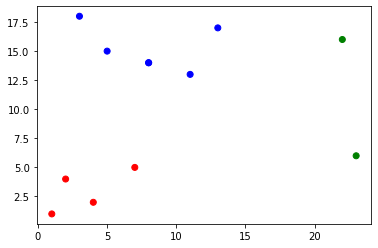

In [164]:
## TODO: Visualization (3 clusters)
clust1_int = process_cluster( cluster1)
clust2_int = process_cluster( cluster2)
clust3_int = process_cluster( cluster3)

A = np.array( clust1_int)
B = np.array( clust2_int) 
C = np.array( clust3_int )
D = np.concatenate( (A, B, C), axis=0)

print(f' Cluster 1: {clust1_int}')
print(f' Cluster 2: {clust2_int}')
print(f' Cluster 3: {clust3_int}')

colormap = np.array([ 'red', 'blue', 'green'])
categories = np.array([0,0,0,0,1,1,1,1,1,1,2,2])
plt.scatter( D[:,0] , D[:, 1], c=colormap[categories])


Evaluation: SSE with centroids (3.5, 3.0) (8.0, 15.166666666666666) (22.5, 11.0)

In [229]:
SSE = 0
for item in clust1_int:
    x, y = item
    SSE += ( (int(x)- 3.5 )**2 +(int(y) - 3.0)**2 )

for item in clust2_int:
    x,y = item
    SSE += ( (int(x)- 8.0)**2 +(int(y) - 15.2)**2 )
    
for item in clust3_int:
    x, y = item
    SSE += ( (int(x)- 22.5)**2 +(int(y) - 11.0)**2 )
    
print(f'SSE for centroid (3.5, 3.0) and (8.0, 15.2) and (22.5, 11) is: {SSE}')

SSE for centroid (3.5, 3.0) and (8.0, 15.2) and (22.5, 11) is: 168.34
